In [118]:
import subprocess

import numpy as np

subprocess.run(['python', '-m', 'GenerateStats.gen_stats'])

Running Simulation with task distribution estimation...
Saving stats in stats_with_learning.csv...
Running Simulation with fixed task distribution...
Saving stats in stats_without_learning.csv...


CompletedProcess(args=['python', '-m', 'GenerateStats.gen_stats'], returncode=0)

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df_learning = pd.read_csv("stats_with_learning.csv")
print(df_learning)

df = pd.read_csv("stats_without_learning.csv")
print(df)

# TODO makespans should not be in the dataframe. It is simply the last time + 1
# TODO fix the other cells to match the dataframes

     time  costs  serv_times  runtimes  makespans
0       0     80           0  1.778434          1
1       1    120           0  0.000119          2
2       2    160           0  0.000107          3
3       3    200           0  0.000104          4
4       4    240           0  0.000105          5
..    ...    ...         ...       ...        ...
452   452  18160         107  0.014566        453
453   453  18200         107  0.035670        454
454   454  18240         107  0.030129        455
455   455  18280         107  0.037610        456
456   456  18320         104  0.029057        457

[457 rows x 5 columns]
     time  costs  serv_times  runtimes  makespans
0       0     80           0  2.086840          1
1       1    120           0  0.000116          2
2       2    160           0  0.000107          3
3       3    200           0  0.000107          4
4       4    240           0  0.000104          5
..    ...    ...         ...       ...        ...
447   447  17960          

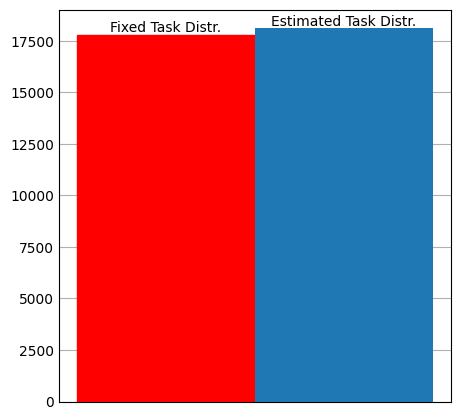

In [94]:
plt.style.use('_mpl-gallery')

plt.figure(figsize=(4, 4))

bars = plt.bar([0, 1], [cost, cost_learning], width=1, align='center')
plt.bar_label(bars, labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')
plt.xticks([])

plt.show()

In [95]:
"Fixed cost: " + str(cost) + " Learning cost: " + str(cost_learning)

'Fixed cost: 17800 Learning cost: 18120'

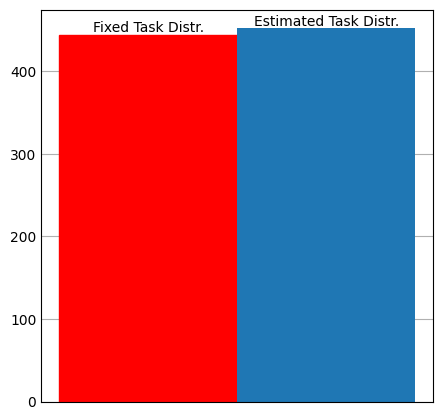

In [96]:
plt.figure(figsize=(4, 4))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')
plt.xticks([])

plt.show()

In [97]:
"Fixed makespan: " + str(makespan) + " Learning makespan: " + str(makespan_learning)

'Fixed makespan: 444 Learning makespan: 452'

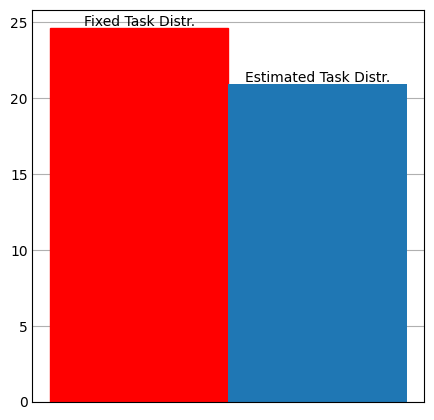

In [109]:
plt.figure(figsize=(4, 4))

bars = plt.bar([0, 1], [sum(runtimes), sum(runtimes_learning)], width=1, align='center')
plt.bar_label(bars, labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')
plt.xticks([])

plt.show()

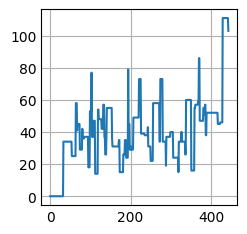

In [111]:
serv_times.plot()

plt.show()